In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Loading the dataset
DataSet = pd.read_csv(r"DG_preprocessing.csv")
DataSet

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1
...,...,...,...
54032,True,brussels reuters nato allies tuesday welcomed ...,1
54033,True,london reuters lexisnexis provider legal regul...,1
54034,True,minsk reuters shadow disused sovietera factori...,1
54035,True,moscow reuters vatican secretary state cardina...,1


#### Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      54037 non-null  bool  
 1   full_text  54037 non-null  object
 2   digit      54037 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 897.2+ KB


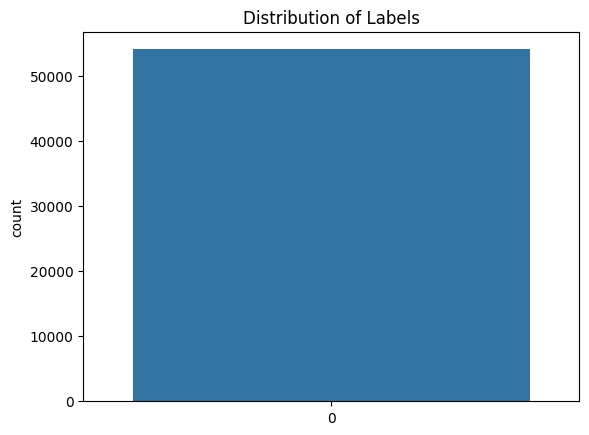

In [3]:
#Checking the structure and basic statistics of the dataset
DataSet.head()
DataSet.info()
DataSet.describe()

#Checking the distribution of the target variable
sns.countplot(DataSet['label'])
plt.title('Distribution of Labels')
plt.show()

#### Data Cleaning and Preprocessing

In [4]:
# #Filling missing values, if any
# DataSet = DataSet.fillna('')
# DataSet

In [5]:
# #Performing text cleaning and preprocessing
# import re

# def preprocess_text(text):
    
#     #Removing special characters and symbols
#     text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
#     #Converting text to lowercase
#     text = text.lower()
    
#     #Removing extra whitespaces
#     text = re.sub(r"\s+", " ", text)
    
#     #Other preprocessing steps (if any)
    
#     return text

# DataSet['statement'] = DataSet['statement'].apply(preprocess_text)

In [6]:
#Splitting the dataset into train and test sets
X = DataSet['full_text']
Y = DataSet['label']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Feature Extraction

In [7]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X_Train = Vectorizer.fit_transform(X_Train)
X_Test = Vectorizer.transform(X_Test)

#### Model Training and Evaluation

In [8]:
#Creating and training the Naive Bayes model
NBModel = MultinomialNB()
NBModel.fit(X_Train, Y_Train)

MultinomialNB()

In [9]:
#Making predictions on the testing set
Y_Pred = NBModel.predict(X_Test)

In [10]:
#Evaluating the model
print(classification_report(Y_Test, Y_Pred))
print("Accuracy:", metrics.accuracy_score(Y_Test, Y_Pred))
ConfMatrix = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix:")
print(ConfMatrix)

              precision    recall  f1-score   support

       False       0.93      0.82      0.87      5286
        True       0.84      0.94      0.89      5522

    accuracy                           0.88     10808
   macro avg       0.89      0.88      0.88     10808
weighted avg       0.89      0.88      0.88     10808

Accuracy: 0.881661732050333
Confusion Matrix:
[[4318  968]
 [ 311 5211]]


#### Model Deployment

In [11]:
#Saving the trained model for future use
joblib.dump(NBModel, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

#### Bar Plot: Visualize the distribution of sentiments in the dataset

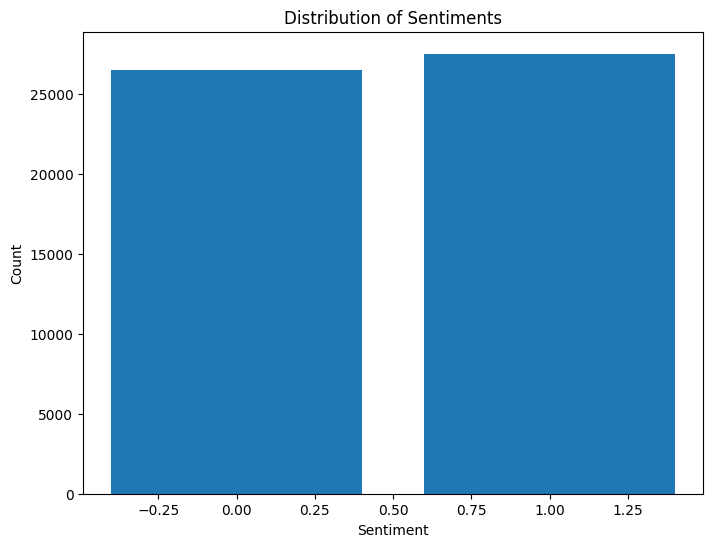

In [14]:
SentimentCounts = DataSet['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(SentimentCounts.index, SentimentCounts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#### Confusion Matrix: Evaluate the performance of the sentiment classification model

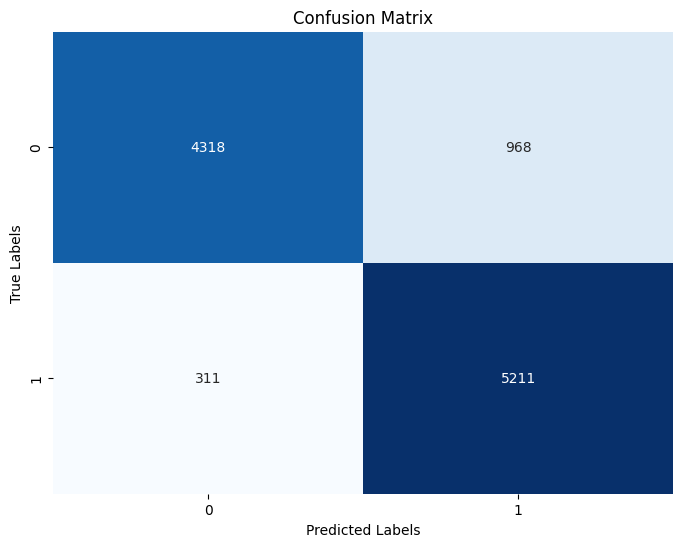

In [15]:
#Creating a confusion matrix
CM = confusion_matrix(Y_Test, Y_Pred)

#Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Bar Chart: Comparison of accuracy of Naive Bayes with a hypothetical baseline model

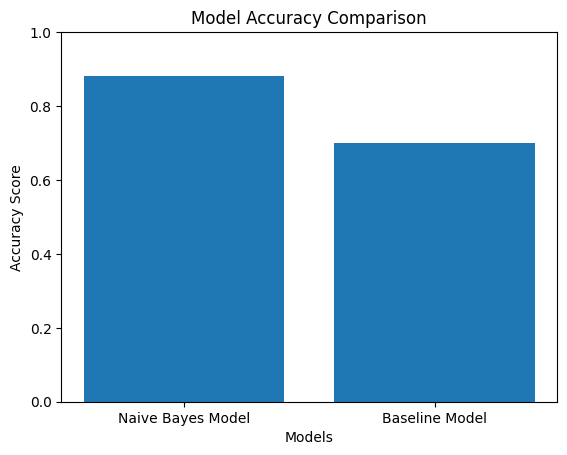

In [18]:
AccuracyScores = [accuracy_score(Y_Test, Y_Pred), 0.70]  
Models = ['Naive Bayes Model', 'Baseline Model']

plt.bar(Models, AccuracyScores)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])  #Setting the y-axis limits between 0 and 1
plt.show()